# Exploratory Data Analysis for Dataset 1: Heart Disease Dataset

## Importing Libraries

In [87]:
import sklearn
import numpy as np
import pandas as pd
import os
import tarfile
import urllib
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import urllib.request
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import pointbiserialr, chi2_contingency

## Retrieving and Cleaning (Lab 1)
- Getting CSV file
- Retrieving basic information on the dataset
- Removing duplicates and instances with null values

In [88]:
df=pd.read_csv('../../data/dataset/original_datasets/heart_2020_cleaned.csv')

In [89]:
#First 10 rows of the dataframe
df.head(10)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [92]:
df.drop_duplicates(inplace=True)
print('Dataframe shape before:', df_shape)
print('\nDataframe shape after:', df.shape)

Dataframe shape before: (319795, 18)

Dataframe shape after: (301717, 18)


In [93]:
df=df.reset_index(drop=True)
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


Heart Disease Count: 
 HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64 



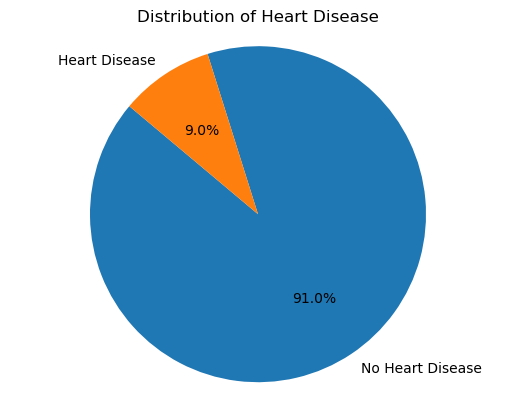

In [94]:

counts = df['HeartDisease'].value_counts()
print ('Heart Disease Count: \n' , counts, '\n')
plt.pie(counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Heart Disease')
plt.show()


In [95]:
df['Diabetic'].value_counts()

Diabetic
No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: count, dtype: int64

Making the diabetic feature binary due to the borderline and during pregnancy categories making up only 3%

In [96]:
df['Diabetic'] = df['Diabetic'].replace({
    'No, borderline diabetes': 'Boderline',
    'Yes (during pregnancy)': 'Pregnancy'
})

## General Statistics and Visualization

In [97]:
cat_features=df.select_dtypes("object").columns
len(cat_features),cat_features

(14,
 Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
        'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
        'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
       dtype='object'))

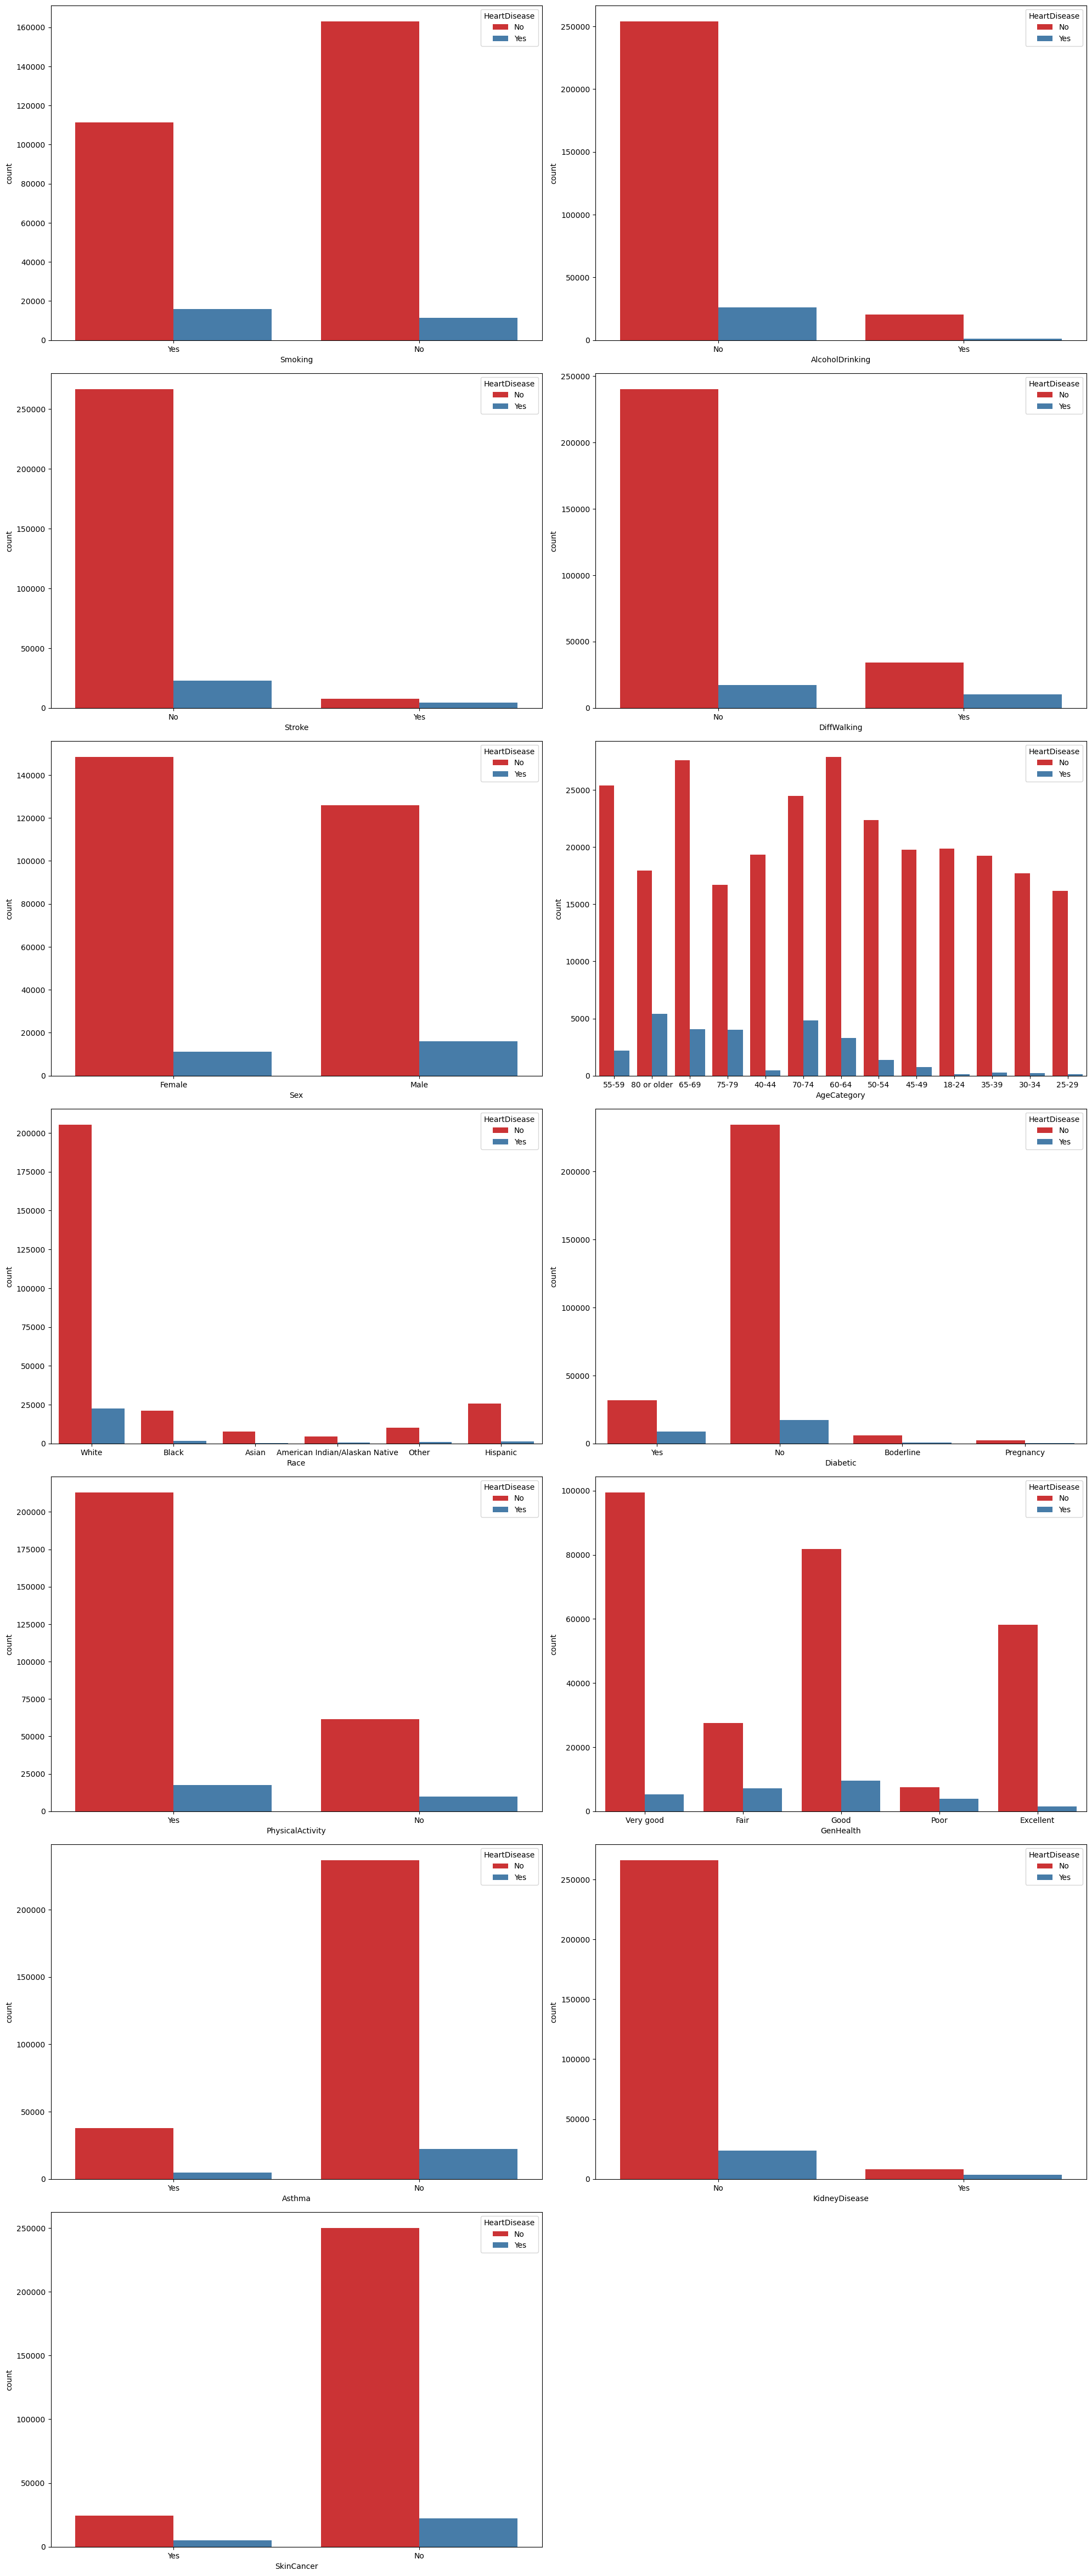

In [98]:
plt.figure(figsize=(20,60))

for i in range(1,len(cat_features)):
    plt.subplot(9,2,i)
    ax=sb.countplot(x=cat_features[i],data=df,hue="HeartDisease",palette='Set1')
    labels = ax.get_xticklabels()
    for label in labels:
        label.set_wrap(True)
    
plt.tight_layout()
plt.show()

In [99]:
X = df.drop("HeartDisease", axis=1)  # Features
y = df["HeartDisease"]  # Target

In [100]:
rus = RandomUnderSampler(random_state=45)  # Random seed for reproducibility
X_resampled, y_resampled = rus.fit_resample(X, y)

In [101]:
print("Class distribution after undersampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after undersampling:
HeartDisease
No     27261
Yes    27261
Name: count, dtype: int64


In [102]:
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['HeartDisease'] = y_resampled

In [103]:
resampled_df=resampled_df.reset_index(drop=True)
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54522 entries, 0 to 54521
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               54522 non-null  float64
 1   Smoking           54522 non-null  object 
 2   AlcoholDrinking   54522 non-null  object 
 3   Stroke            54522 non-null  object 
 4   PhysicalHealth    54522 non-null  float64
 5   MentalHealth      54522 non-null  float64
 6   DiffWalking       54522 non-null  object 
 7   Sex               54522 non-null  object 
 8   AgeCategory       54522 non-null  object 
 9   Race              54522 non-null  object 
 10  Diabetic          54522 non-null  object 
 11  PhysicalActivity  54522 non-null  object 
 12  GenHealth         54522 non-null  object 
 13  SleepTime         54522 non-null  float64
 14  Asthma            54522 non-null  object 
 15  KidneyDisease     54522 non-null  object 
 16  SkinCancer        54522 non-null  object

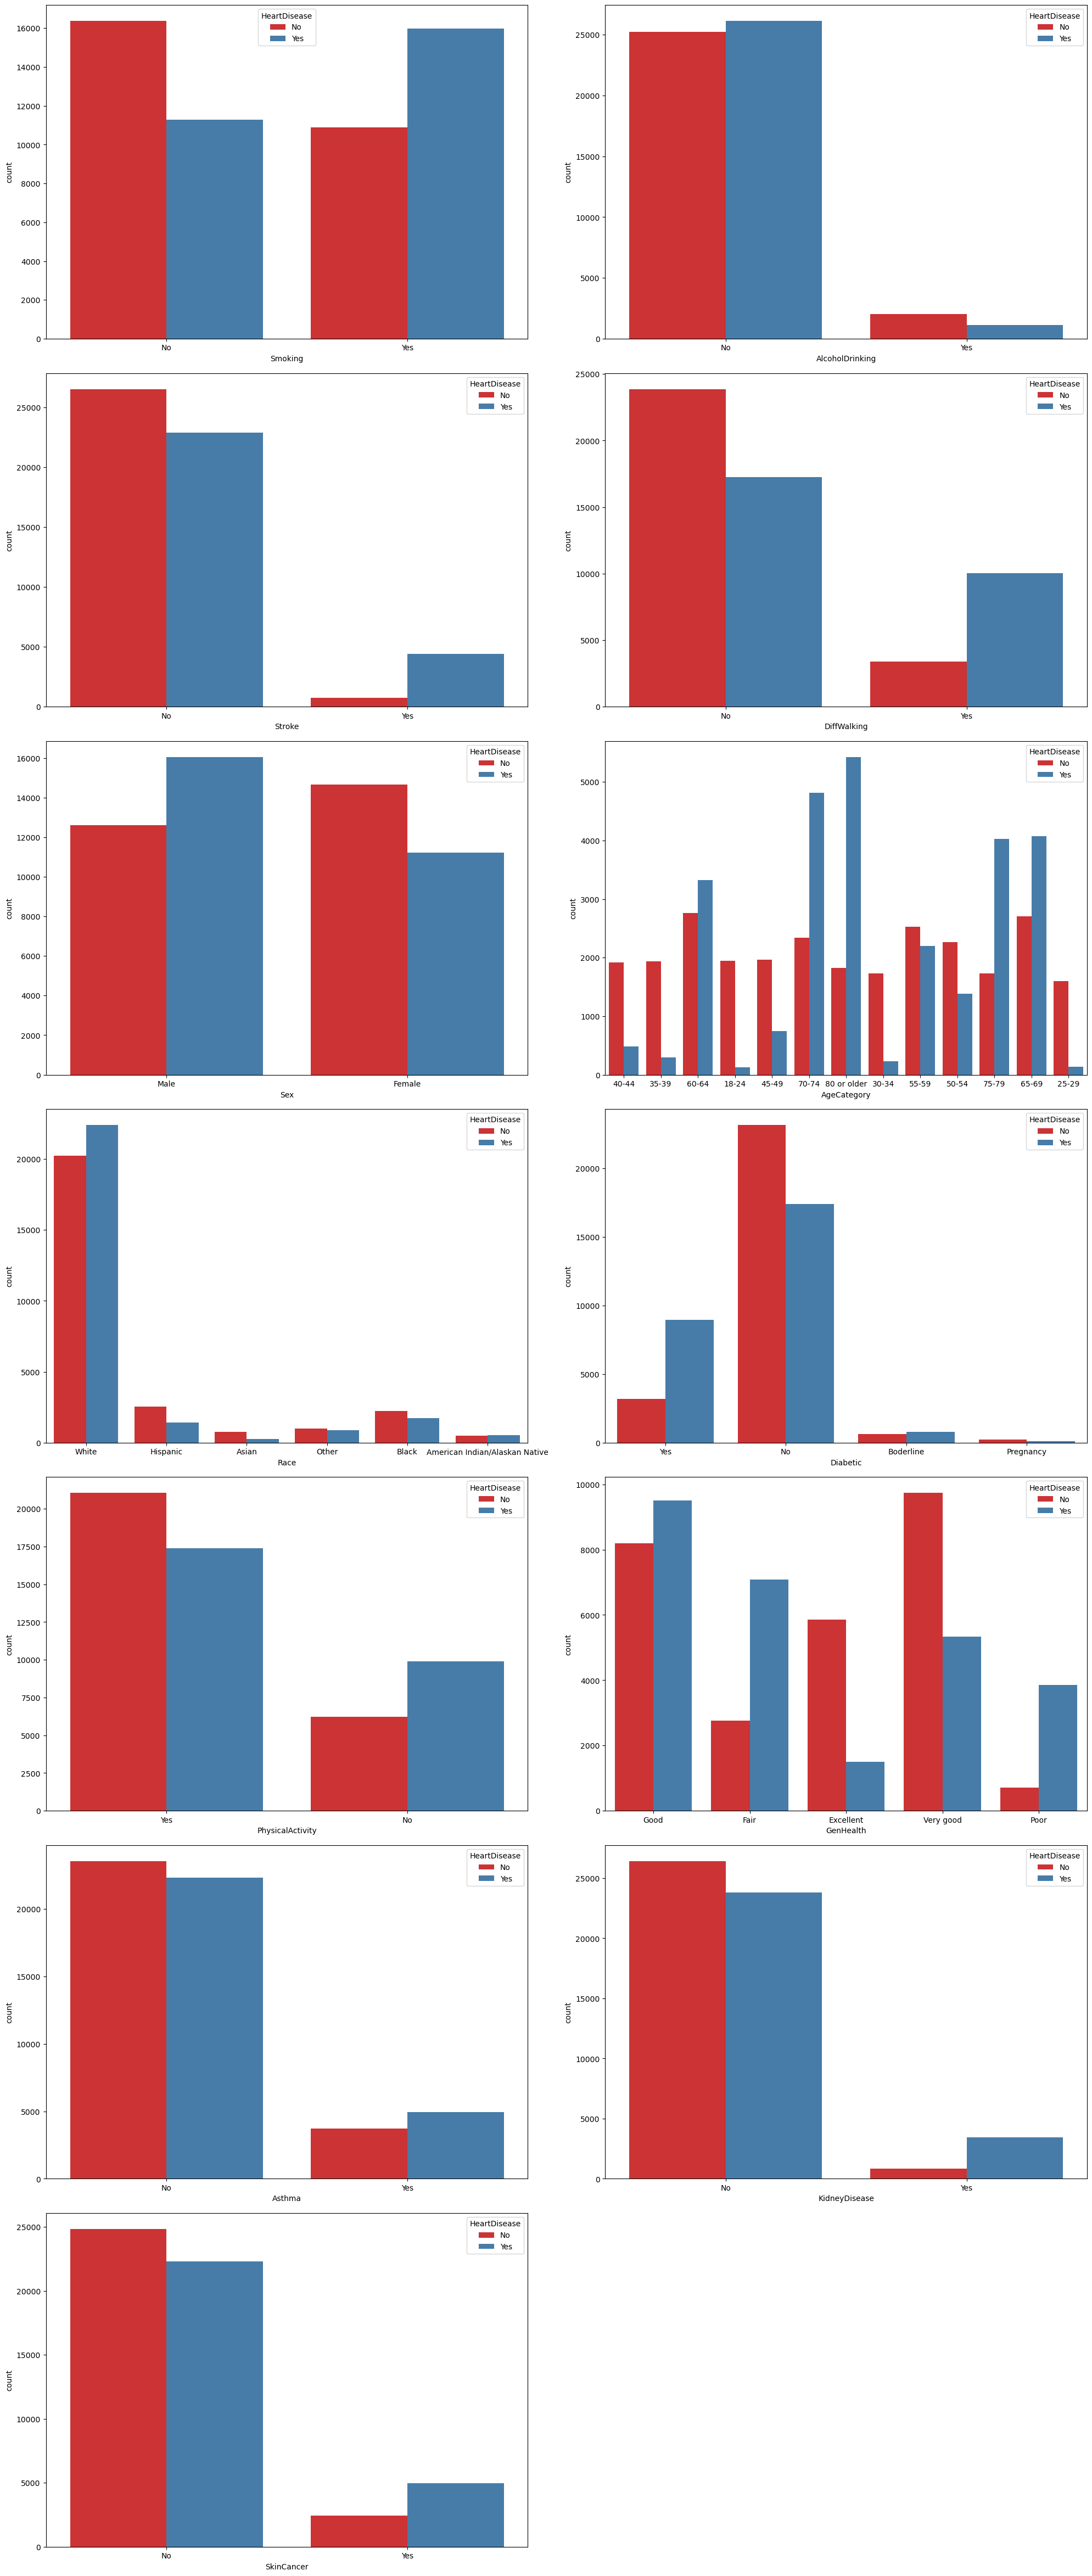

In [104]:
plt.figure(figsize=(20,60))

for i in range(1,len(cat_features)):
    plt.subplot(9,2,i)
    ax = sb.countplot(x=cat_features[i],data=resampled_df,hue="HeartDisease",palette='Set1')
    labels = ax.get_xticklabels()
    for label in labels:
        label.set_wrap(True)
    
plt.tight_layout()
plt.show()

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

## Feature Selection (Lab 2)
The dataset has 18 features and we need to go through the process of selecting features

In [107]:
def encode_and_drop(dataframe):
    # Get all categorical columns except 'GenHealth'
    categorical_columns = dataframe.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('GenHealth') 

    # Initialize OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    # Apply one-hot encoding 
    oh_encoded = encoder.fit_transform(dataframe[categorical_columns])
    oh_df = pd.DataFrame(oh_encoded, columns=encoder.get_feature_names_out(categorical_columns))

    # Concatenate the one-hot encoded dataframe with the original dataframe
    df_encode = pd.concat([dataframe, oh_df], axis=1)

    # Drop one of the encoded columns for each original binary feature
    for col in categorical_columns:
        encoded_cols = [c for c in oh_df.columns if col in c]
        if len(encoded_cols) == 2:  # It's a binary feature
            df_encode = df_encode.drop(encoded_cols[0], axis=1)

    # Drop original categorical columns 
    df_encode = df_encode.drop(categorical_columns, axis=1)

    # Map 'GenHealth' to numerical values
    df_encode['GenHealth'] = df_encode['GenHealth'].map({'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4})

    heart_disease_col = [col for col in df_encode.columns if 'HeartDisease_Yes' in col][0]
    df_encode = df_encode[[c for c in df_encode if c != heart_disease_col] + [heart_disease_col]]

    return df_encode

In [108]:
df_encoded = encode_and_drop(df)
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301717 entries, 0 to 301716
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   BMI                      301717 non-null  float64
 1   PhysicalHealth           301717 non-null  float64
 2   MentalHealth             301717 non-null  float64
 3   GenHealth                301717 non-null  int64  
 4   SleepTime                301717 non-null  float64
 5   Smoking_Yes              301717 non-null  float64
 6   AlcoholDrinking_Yes      301717 non-null  float64
 7   Stroke_Yes               301717 non-null  float64
 8   DiffWalking_Yes          301717 non-null  float64
 9   Sex_Male                 301717 non-null  float64
 10  AgeCategory_25-29        301717 non-null  float64
 11  AgeCategory_30-34        301717 non-null  float64
 12  AgeCategory_35-39        301717 non-null  float64
 13  AgeCategory_40-44        301717 non-null  float64
 14  AgeC

In [109]:
df_encoded.tail(30)

,BMI,PhysicalHealth,MentalHealth,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Race_Other,Race_White,Diabetic_No,Diabetic_Pregnancy,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes,HeartDisease_Yes
301687,39.87,0.0,0.0,2,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
301688,38.45,30.0,15.0,0,6.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
301689,36.90,0.0,0.0,1,9.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301690,36.21,0.0,0.0,2,8.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
301691,32.78,0.0,0.0,3,6.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
301692,25.25,0.0,0.0,2,7.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
301693,26.63,0.0,0.0,3,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301694,23.62,0.0,0.0,2,7.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
301695,30.90,0.0,0.0,4,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
301696,26.45,3.0,2.0,1,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
# 1. Correlation with continuous features (Point-Biserial)
def pointBiserialCalc(dataframe):
    continuous_features = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]
    correlations_continuous = {}
    for feature in continuous_features:
        correlation, p_value = pointbiserialr(dataframe[feature], dataframe["HeartDisease_Yes"])
        correlations_continuous[feature] = correlation
    return correlations_continuous


In [112]:
resample_encoded=encode_and_drop(resampled_df)


DataFrame does not contain NaNs (missing values).


In [113]:
resample_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54522 entries, 0 to 54521
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BMI                      54522 non-null  float64
 1   PhysicalHealth           54522 non-null  float64
 2   MentalHealth             54522 non-null  float64
 3   GenHealth                54522 non-null  int64  
 4   SleepTime                54522 non-null  float64
 5   Smoking_Yes              54522 non-null  float64
 6   AlcoholDrinking_Yes      54522 non-null  float64
 7   Stroke_Yes               54522 non-null  float64
 8   DiffWalking_Yes          54522 non-null  float64
 9   Sex_Male                 54522 non-null  float64
 10  AgeCategory_25-29        54522 non-null  float64
 11  AgeCategory_30-34        54522 non-null  float64
 12  AgeCategory_35-39        54522 non-null  float64
 13  AgeCategory_40-44        54522 non-null  float64
 14  AgeCategory_45-49     

In [123]:
pointBiserialCalc(df_encoded)
pointBiserialCalc(resample_encoded)

{'BMI': 0.0744510038196731,
 'PhysicalHealth': 0.23464076076218696,
 'MentalHealth': 0.03640639006577138,
 'SleepTime': 0.014148864370274456}

In [115]:
def cramers_v(x, y):
    """
    Calculates Cramer's V statistic for categorical-categorical association.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0,
    phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


def calculate_cramers_v_correlations(df, target_variable):

    # Get the target variable 
    heart_disease = df[target_variable]

    # Select categorical features (excluding the target variable)
    categorical_features = [col for col in df.columns if '_' in col and col != target_variable] + ['GenHealth']

    # Calculate Cramer's V for each categorical feature with the target variable
    cramers_v_correlations = {}
    for feature in categorical_features:
        cramers_v_correlations[feature] = cramers_v(df[feature], heart_disease)

    return cramers_v_correlations

In [124]:
def calculate_and_sort_correlations(df, target_variable):
    """
    Calculates and sorts correlations (Point-Biserial and Cramer's V) 
    for a given DataFrame and target variable.
    """

    # Calculate continuous and categorical correlations
    correlations_continuous = pointBiserialCalc(df)
    correlations_categorical = calculate_cramers_v_correlations(df, target_variable)

    # Combine and sort correlations
    all_correlations = {**correlations_continuous, **correlations_categorical}
    all_correlations = pd.Series(all_correlations)
    all_correlations = all_correlations.abs().sort_values(ascending=False)

    return all_correlations

# Calculate and print sorted correlations
df_correlations = calculate_and_sort_correlations(df_encoded, 'HeartDisease_Yes')
resample_correlations = calculate_and_sort_correlations(resample_encoded, 'HeartDisease_Yes')

print("Correlations with HeartDisease in data_encoded (sorted):\n", df_correlations)
print("\nCorrelations with HeartDisease in resample_encoded (sorted):\n", resample_correlations)

Correlations with HeartDisease in data_encoded (sorted):
 GenHealth                  0.253687
DiffWalking_Yes            0.196396
Stroke_Yes                 0.194627
Diabetic_Yes               0.178891
Diabetic_No                0.165941
PhysicalHealth             0.165235
AgeCategory_80 or older    0.143433
KidneyDisease_Yes          0.142630
Smoking_Yes                0.104496
AgeCategory_75-79          0.098513
PhysicalActivity_Yes       0.093566
SkinCancer_Yes             0.090607
AgeCategory_70-74          0.084801
Sex_Male                   0.074401
AgeCategory_35-39          0.068946
AgeCategory_25-29          0.068497
AgeCategory_30-34          0.068180
AgeCategory_40-44          0.060886
AgeCategory_45-49          0.050957
Race_White                 0.048845
BMI                        0.047260
AgeCategory_65-69          0.045679
Race_Hispanic              0.040619
AlcoholDrinking_Yes        0.036220
Asthma_Yes                 0.035721
Race_Asian                 0.032754
AgeCat

In [117]:
def create_feature_sets(df, correlations, target_variable, num_features_list):
    """
    Creates multiple datasets with different numbers of features based on correlations.
    Returns:
      A list of DataFrames, each with a different number of features.
    """

    datasets = []
    for num_features in num_features_list:
        top_features = correlations.index[:num_features].tolist()
        dataset = df[top_features + [target_variable]].copy()  # Include target variable
        datasets.append(dataset)
    return datasets

In [118]:
def save_datasets_to_csv(datasets, dataset_name, num_features_list):
    """
    Saves a list of datasets to CSV files.

    Args:
      datasets: A list of pandas DataFrames.
      dataset_name: A string to include in the file names (e.g., 'data_encoded').
      num_features_list: A list of integers specifying the number of features in each dataset.
    """

    if not os.path.exists('datasets'):
        os.makedirs('datasets')  # Create the directory if it doesn't exist

    for i, dataset in enumerate(datasets):
        num_features = num_features_list[i]
        file_name = f'datasets/{dataset_name}_{num_features}_features.csv'
        dataset.to_csv(file_name, index=False)  # Save to CSV without index


In [119]:
# Create datasets with different numbers of features
num_features_list = [10, 20, len(df_correlations)]  # Top 10, top 20, and all features

df_datasets = create_feature_sets(data_encoded, df_correlations, 'HeartDisease_Yes', num_features_list)
resample_datasets = create_feature_sets(resample_encoded, resample_correlations, 'HeartDisease_Yes', num_features_list)

#Save datasets to CSV files
save_datasets_to_csv(df_datasets, 'data_encoded', num_features_list)
save_datasets_to_csv(resample_datasets, 'resample_encoded', num_features_list)